In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

#### 生成数据点

In [2]:
import numpy as np

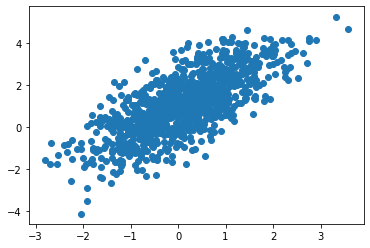

In [3]:
n = np.random.randn(2, 1000)
x = np.array([[n[0][i], n[1][i]] for i in range(1000)])
x[:, 1] += x[:, 0]+1
plt.scatter(x[:, 0], x[:, 1], marker="o")

#### 数据预处理（注意横纵坐标的不同）

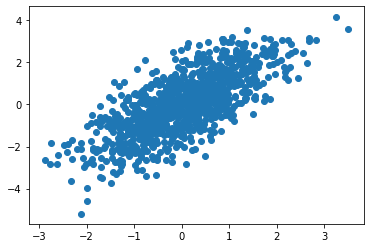

In [4]:
# 去均值
x1 = x - np.mean(x, axis=0)
plt.scatter(x1[:, 0], x1[:, 1], marker="o")

In [5]:
from sklearn import preprocessing as pre

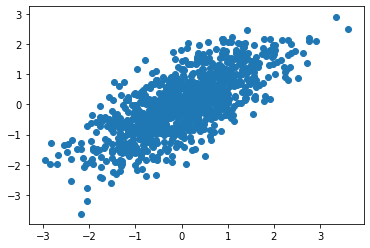

In [6]:
# 标准差归一化
scaler = pre.StandardScaler()
scaler.fit(x)
x1=scaler.transform(x)
plt.scatter(x1[:, 0], x1[:, 1], marker='o')

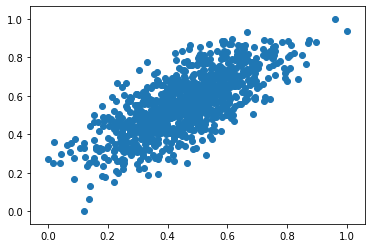

In [7]:
# MinMax归一化
scaler = pre.MinMaxScaler()
x1=scaler.fit_transform(x)
plt.scatter(x1[:, 0], x1[:, 1], marker='o')

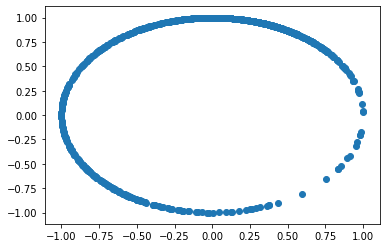

In [8]:
# L2正则化
normalizer = pre.Normalizer()
x1=normalizer.fit_transform(x)
plt.scatter(x1[:, 0], x1[:, 1], marker='o')

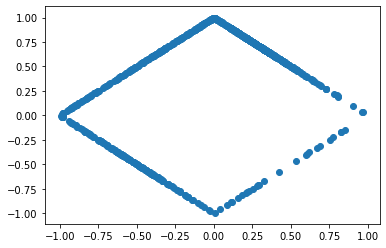

In [9]:
# L1正则化
normalizer = pre.Normalizer(norm="l1")
x1=normalizer.fit_transform(x)
plt.scatter(x1[:, 0], x1[:, 1], marker='o')

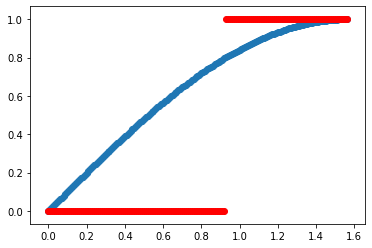

In [10]:
# 二值化
x2 = np.arange(0, 1.57, .01)
y2 = np.sin(x2)
binarizer=pre.Binarizer(threshold=0.8)
y3 = binarizer.transform([y2])
plt.scatter(x2, y2, marker="o")
plt.scatter(x2, y3, marker="o", c="r")

In [11]:
# 数值的One-hot编码
data = [[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]]
encoder = pre.OneHotEncoder()
encoder.fit(data)
x2 = encoder.transform(data).toarray()
x2

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

In [12]:
# 标签的One-hot编码
labels = ["张三", "李四", "刘五", "李四"]
encoder = pre.LabelEncoder()
en_labels = encoder.fit_transform(labels)
onehotter = pre.OneHotEncoder()
onehot = onehotter.fit_transform(en_labels.reshape(-1, 1))
print(en_labels)
print(onehot.toarray())

[1 2 0 2]
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


#### K折交叉验证

In [13]:
from sklearn.model_selection import KFold

In [14]:
# 将数据集分为5折
KF = KFold(n_splits=5)

In [15]:
# 加载手写体数字的数据集
from sklearn.datasets import load_digits
x, y = load_digits().data, load_digits().target

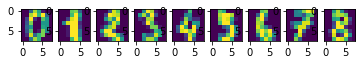

In [16]:
# 对手写体数字进行一个简单的可视化
for i in range(9):
    plt.subplot(191+i)
    plt.imshow(x[i].reshape(8, 8))

In [17]:
# KFold会返回一个索引，可以根据返回的索引去获取数据集中对应的数据
print(next(KF.split(x)))

(array([ 360,  361,  362, ..., 1794, 1795, 1796]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 1

In [18]:
from sklearn import svm

In [19]:
svm_ = svm.SVC()

In [20]:
# 直接使用KFold对模型进行训练
for train_idx, test_idx in KF.split(x):
    x_train, x_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    svm_.fit(x_train, y_train)
    print(svm_.score(x_test, y_test))

0.9694444444444444
0.9472222222222222
0.9832869080779945
0.9888579387186629
0.9415041782729805


In [21]:
# 上述过程的简洁写法
from sklearn.model_selection import cross_val_score
# cv参数控制交叉验证的折数
cross_val_score(svm_, x, y, cv=10)

array([0.94444444, 0.98888889, 0.92777778, 0.96666667, 0.98333333,
       0.98888889, 0.98888889, 0.99441341, 0.96089385, 0.95530726])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# 留出法划分训练集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [25]:
# accuracy_score函数用来计算准确率
svm_.fit(x_train, y_train)
y_pred = svm_.predict(x_test)
accuracy_score(y_test, y_pred)

0.9861111111111112

In [26]:
# classification_report函数可以用来计算召回率等
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        36
           4       1.00      0.96      0.98        27
           5       1.00      0.97      0.99        40
           6       0.97      0.97      0.97        37
           7       1.00      1.00      1.00        24
           8       0.93      0.97      0.95        38
           9       1.00      0.97      0.99        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [27]:
# confusion_matrix函数可以用来查看混淆矩阵
confusion_matrix(y_test, y_pred)

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 26,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 39,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 39]], dtype=int64)